In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = 'c:/Windows/Fonts/malgun.ttf'
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font)

#plt.rc("font", family="AppleGothic")  # 맥인경우

plt.rc("axes", unicode_minus=False)  #-폰트 깨지는 문제 해결

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df=pd.read_csv("./coffee_data/상가업소_202112_01.csv", encoding='cp949')
df.dropna(subset='상호명', inplace=True)
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
       '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
       '경도', '위도']
df_tmp=df[columns].copy()
df_seoul=df_tmp[df_tmp['시도명'] =='서울특별시'].copy()
df_seoul["상호명_소문자"] = df_seoul['상호명'].str.lower()
df_cafe=df_seoul[ df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks') ]
df_cafe=df_cafe[ df_cafe['상권업종중분류명']=='커피점/카페']

coffee=[]
for data in df_cafe['상호명_소문자']:
    if '스타벅스' in data or 'starbucks' in data:
        coffee.append('스타벅스')
    else:
        coffee.append('이디야')
df_cafe['브랜드명']=coffee
df_star=df_cafe[df_cafe['브랜드명']=='스타벅스']
df_star=df_star[["경도", '위도']]
df_star.columns=['longitude', 'latitude']
df_star.reset_index(drop=True, inplace=True)
df_star

,longitude,latitude
0,127.003887,37.582964
1,127.014198,37.484386
2,126.874682,37.527147
3,127.030685,37.611841
4,127.021629,37.523184
...,...,...
462,127.099909,37.467265
463,127.081329,37.562814
464,127.079298,37.619249
465,126.971712,37.554828


In [17]:
bus_df=pd.read_csv("./서울시 버스 위치정보_전처리.csv")
bus_df.drop(['Unnamed: 0'], axis=1, inplace=True)
subway_df=pd.read_csv('./서울_지하철역_위치정보.csv')
subway_df.drop(['Unnamed: 0'], axis=1, inplace=True)
park_df=pd.read_csv('./서울시 주요 공원현황_전처리.csv', encoding='cp949')
park_df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [23]:
bus_df

,latitude,longitude
0,37.493384,126.943573
1,37.485169,126.874971
2,37.536180,127.147895
3,37.542533,126.881136
4,37.370493,126.939581
...,...,...
12653,37.556242,126.940030
12654,37.612833,126.906631
12655,37.578697,127.001993
12656,37.602056,127.108048


In [24]:
subway_df

,line,address,latitude,longitude
0,1,서울특별시 중구 세종대로 지하2(남대문로 5가),37.55716,126.9726
1,1,서울특별시 중구 세종대로 지하101(정동),37.56544,126.9770
2,1,서울특별시 종로구 종로 지하55(종로1가),37.57021,126.9832
3,1,서울특별시 종로구 종로 지하129(종로3가),37.57043,126.9920
4,1,서울특별시 종로구 종로 지하216(종로5가),37.57091,127.0019
...,...,...,...,...
268,9,서울특별시 송파구 백제고분로 지하446(방이동),37.51063,127.1124
269,9,서울특별시 송파구 위례성대로 지하29(방이동),37.51646,127.1163
270,9,서울특별시 송파구 양재대로 지하1233(방이동),37.51609,127.1306
271,9,서울특별시 강동구 강동대로 지하303(둔촌동),37.51942,127.1384


In [27]:
park_df=park_df[["경도", '위도']]
park_df.columns=['longitude', 'latitude']
park_df

,longitude,latitude
0,126.990377,37.550140
1,127.154779,37.540394
2,127.019846,37.426449
3,127.041798,37.543072
4,126.878907,37.571805
...,...,...
123,127.098782,37.587716
124,127.095997,37.579762
125,126.893246,37.571718
126,127.076482,37.627077


In [37]:
total_df=[df_star, subway_df, park_df]
label=['star', 'subway', 'park']

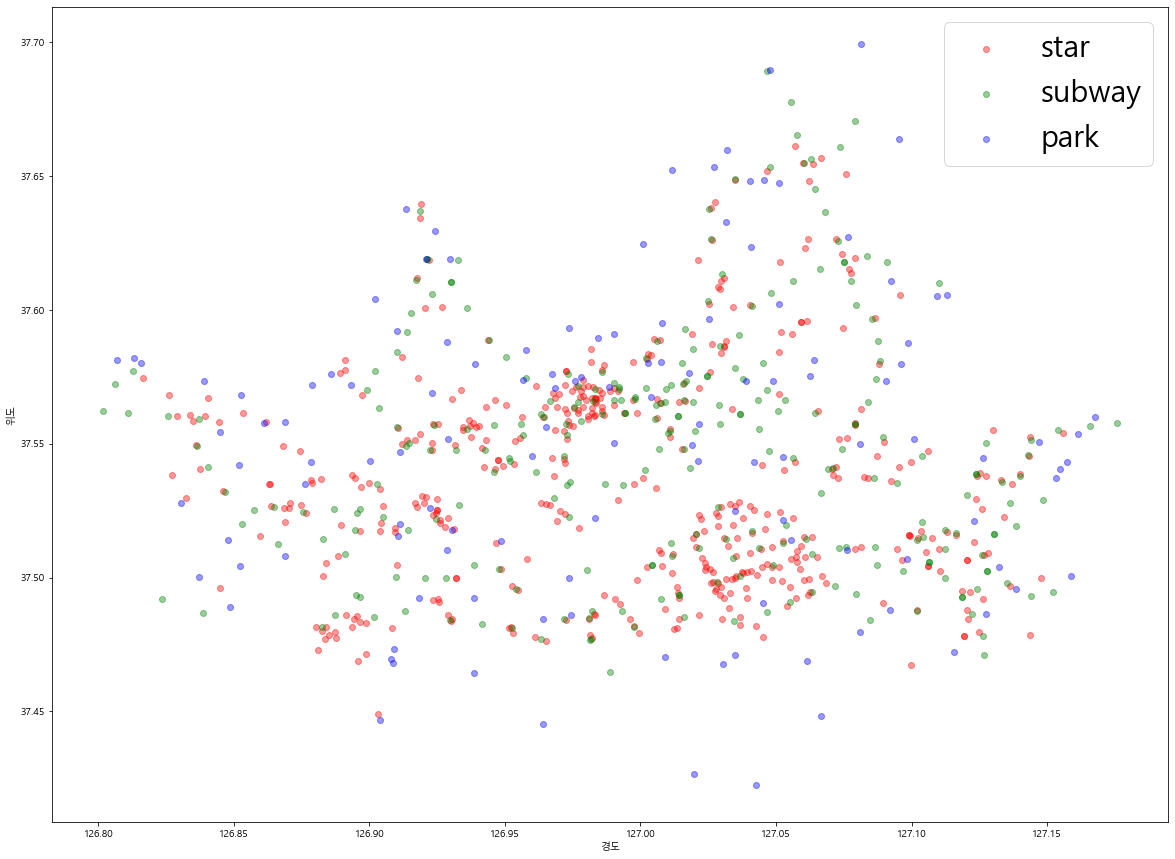

In [42]:
colors=['r', 'g', 'b']

plt.figure(figsize=(20,15))

for i, color in enumerate(colors):
    x_data=total_df[i]['longitude']
    y_data=total_df[i]['latitude']
    plt.scatter(x_data, y_data, color = color, alpha = 0.4, label=label[i])
plt.legend(prop={'size': 30})   
plt.xlabel('경도')
plt.ylabel('위도')

plt.show()


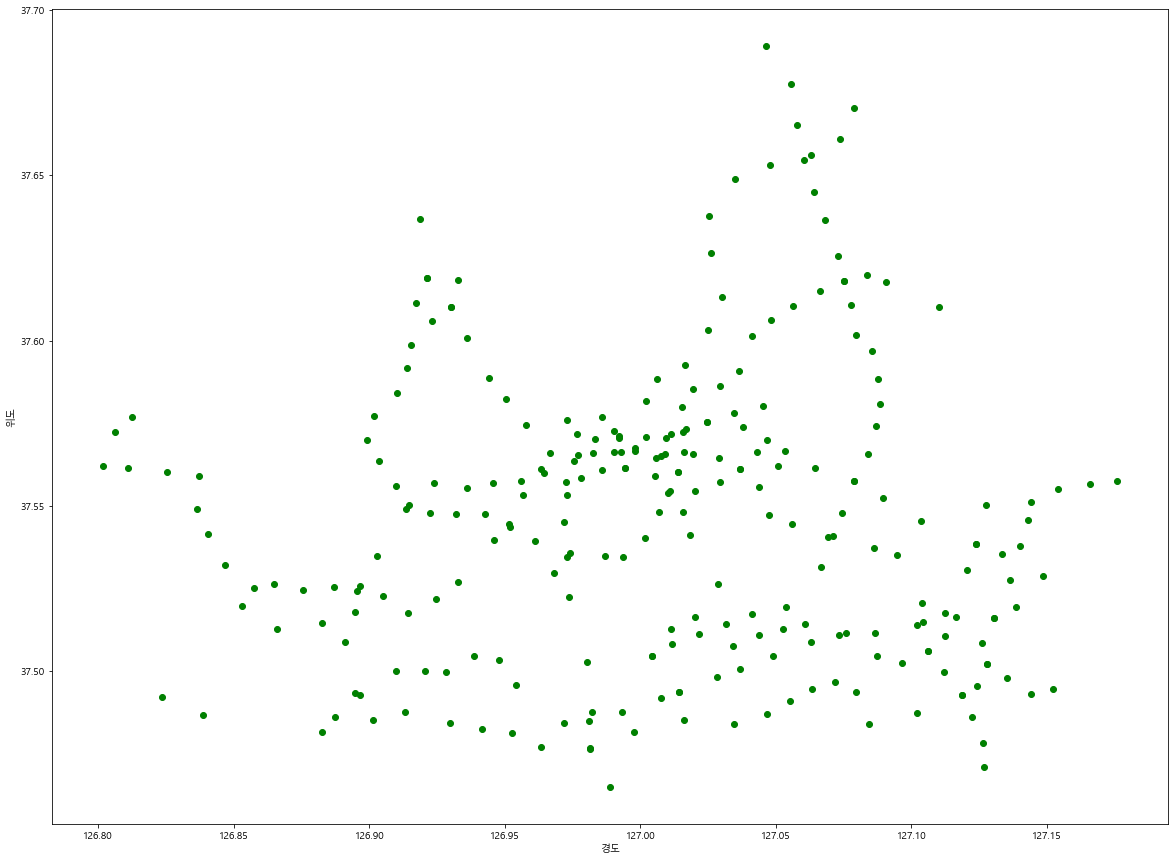

In [43]:
colors=['r', 'g', 'b']

plt.figure(figsize=(20,15))


x_data=total_df[1]['longitude']
y_data=total_df[1]['latitude']
plt.scatter(x_data, y_data, color = 'g', alpha = 1)
plt.xlabel('경도')
plt.ylabel('위도')

plt.show()